# **LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d
import pandas as pd

# Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

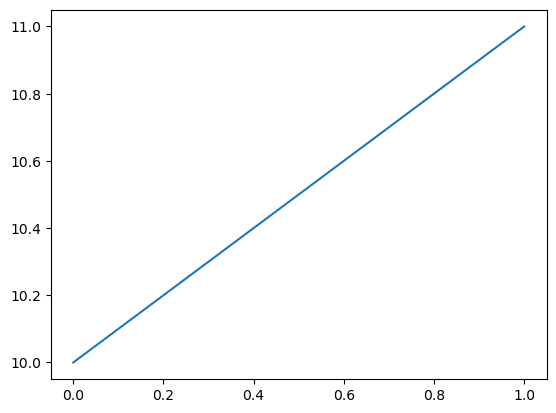

In [3]:
## Write your code here
x = np.linspace(0,1,1000)
x = np.asarray(x)
w0 = 10
w1 = 1
y = w0 + w1*x
plt.plot(x,y)

plt.show()

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

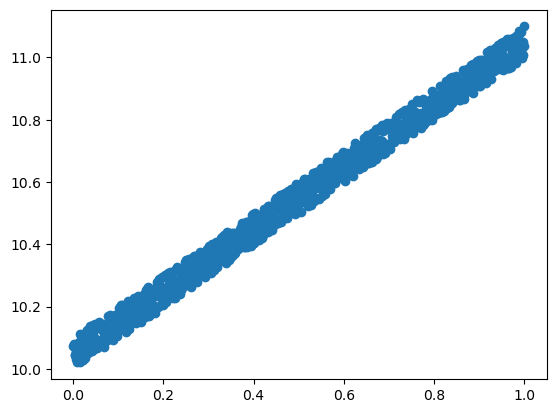

In [4]:
## Write your code here
noise = np.random.uniform(0,1,1000)
noise = np.asarray(noise)
y_cor = w0 + w1*x + 0.1*noise
plt.scatter(x,y_cor)
plt.show()

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

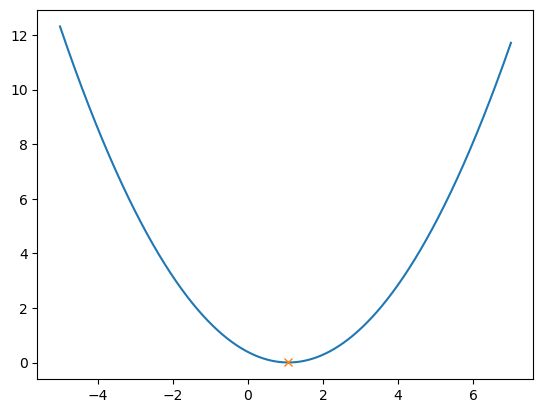

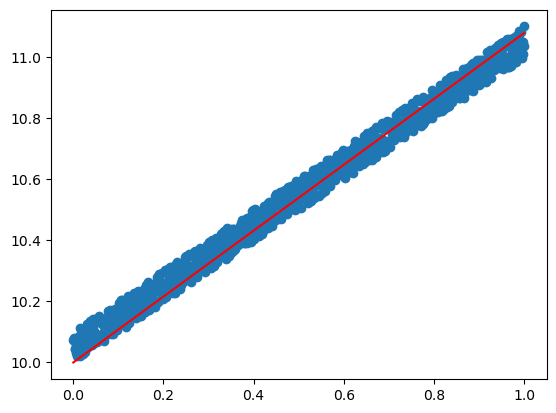

In [5]:
## Write your code here

w0 = 10
w_1 = np.linspace(-5,7,1000)
w_1 = np.asarray(w_1)
best_w1 = w_1[0]
error_least = float('inf')
error = []
for w1 in w_1:
  y_pred = w0 + w1*x
  error1 = np.sum((y_pred - y_cor)**2)/1000.0
  error.append(error1)
  if error1<error_least:
    error_least = error1
    best_w1 = w1

y_pred = w0 + best_w1*x

plt.plot(w_1,error)
plt.plot(best_w1,error_least,marker = 'x')
plt.show()

plt.scatter(x,y_cor)
plt.plot(x,y_pred,'r')
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

In [6]:
## Write your code here
def gradient_descent(params,eps,x,y,alpha,indexs):
  x1 = np.ones((x.shape[0],x.shape[1]+1))
  x1[:,1:] = x
  x = x1
  num = len(y)
  para=[]
  # para.append(params)
  error=[]
  error1 = 1000001.
  error2 = 1000000.
  epoch = 0
  while abs(error1-error2)>eps:
    epoch+=1
    y_pred = np.dot(x,params.transpose())
    error1 = np.sum((y-y_pred)**2)/num
    error.append(error1)

    # tmp = error_nxt
    # error_nxt = error1
    # error_init = tmp
    
    del_error = []
    for i in range((params.size)):
      # print(i)
      if i in indexs:
        x_i = x[:,i].reshape(num,1)
        del_error_i = -2*(np.sum(np.dot((y-y_pred).transpose(),x_i)))/num
        del_error.append(del_error_i)
      else :
        del_error_i = 0
        del_error.append(del_error_i) 

    del_error = np.array(del_error)
    params = params - alpha * del_error

    para.append(params)
    
    y_pred = np.dot(x,params.transpose())
    error2 = np.sum((y-y_pred)**2)/num
    # print(params)
  para = np.array(para)
  error = np.array(error)
  return params,para,error,epoch

1000
[[10.          1.02554947]]


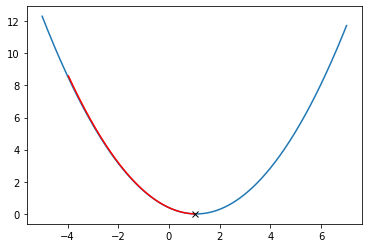

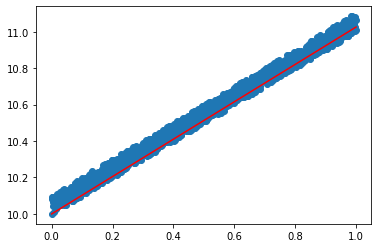

In [ ]:
w = np.array([[10,-4]])
num = 1000
alpha = 0.01
x = x.reshape(num,1)
y_cor = y_cor.reshape(num,1)
print(len(y))
eps = 0.00001000
indexs = [1]
# y_cor = np.array(y_cor)
# print(y_cor[],y)
w,w1,e1,epoch = gradient_descent(w,eps,x,y_cor,alpha,indexs)
print(w)
w1 = w1.reshape(epoch,2)
plt.figure()
plt.plot(w_1,error)
plt.plot(w1[:,1],e1,'r')
plt.plot(w[:,1],e1[epoch-1],'black',marker = 'x')

y2=w[:,0]+x*w[:,1]
plt.figure()
plt.scatter(x,y_cor)
plt.plot(x,y2,'r')
plt.show()

# Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

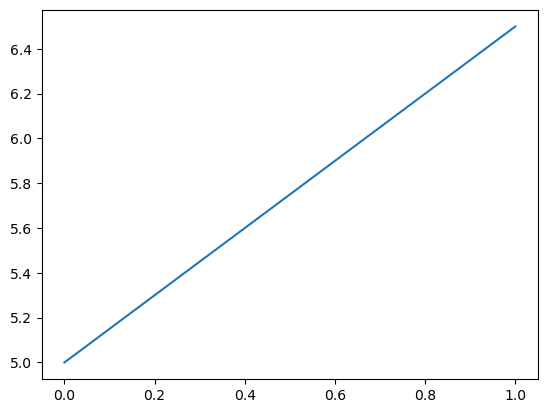

In [7]:
## Write your code here
x = np.linspace(0,1,1000)
x = np.asarray(x)
w_0 = 5
w_1 = 1.5
y = w_0 + w_1*x
plt.plot(x,y)
plt.show()

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

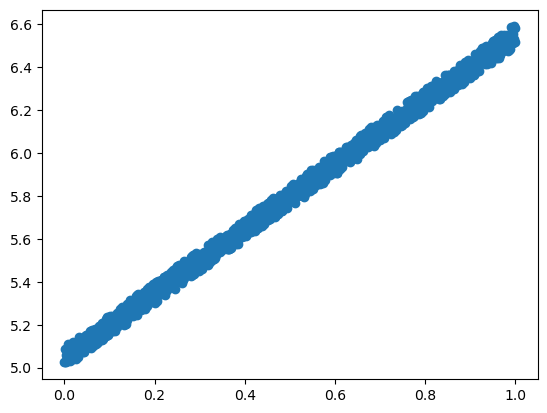

In [8]:
## Write your code here
noise = np.random.uniform(0,1,1000)
noise = np.asarray(noise)
y_cor = w_0 + w_1*x + 0.1*noise
plt.scatter(x,y_cor)
plt.show()


**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

In [9]:
num=1000
# write your code here
w0 = np.linspace(-10,10,1000)
w1 = np.linspace(-10,10,1000)
error = []
for w_0 in w0:
  e2 = []
  for w_1 in w1:
    y1 = w_0 + w_1*x 
    e1 = np.sum((y_cor-y1)**2)/num
    e2.append(e1)
  error.append(e2)

error = np.array(error)
# print(error.shape)

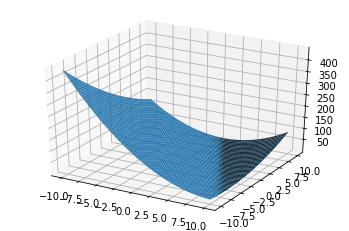

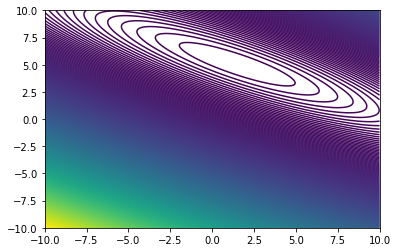

In [ ]:
## Write your code here
w_0, w_1 = np.meshgrid(w0, w1)


ax = plt.axes(projection='3d')
ax.plot_surface(w_1,w_0, error)
plt.show()

plt.contour(w0,w1,error,levels = 500)
plt.show()

**Gradient Descent to find optimal Values**

In [10]:
w1_init = -7 # initialization 
w0_init = -5
lr = 0.2  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001
w = np.array([[-7,-5]])
indexs = [0,1]
x = x.reshape(num,1)
y_cor = y_cor.reshape(num,1)
print(x.shape)
w,w11,e1,epoch = gradient_descent(w,eps,x,y_cor,lr,indexs)
print(w11.shape)
print(w)

(1000, 1)
(38, 1, 2)
[[5.05700856 1.48628249]]


(38, 1)


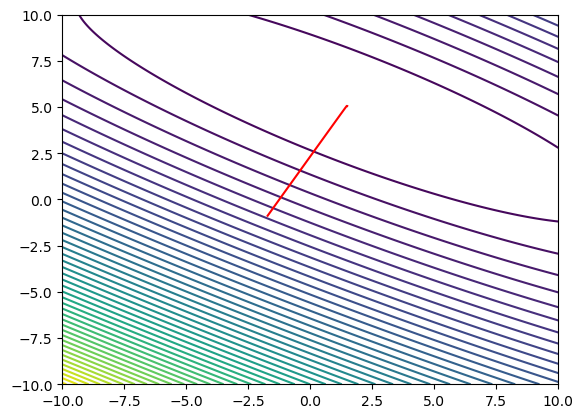

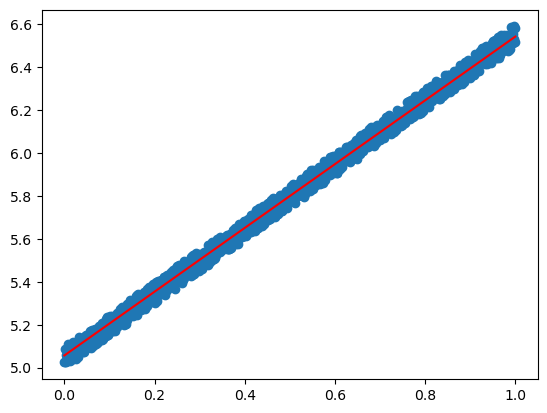

In [11]:
## Write your code here
w11 = w11.reshape(epoch,2)
print(w11[:,1].reshape(epoch,1).shape)

plt.contour(w0,w1,error,levels = 50)
w0_gd = w11[:,0].reshape(epoch,1)
w1_gd = w11[:,1].reshape(epoch,1)
# print(w0_gd)
plt.plot(w1_gd,w0_gd,'r')
# y_pred = w[0] + w[1]*x
plt.show()
y_pred = w[0,0] + w[0,1]*x
plt.scatter(x,y_cor)
plt.plot(x,y_pred,'r')
plt.show()

# Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

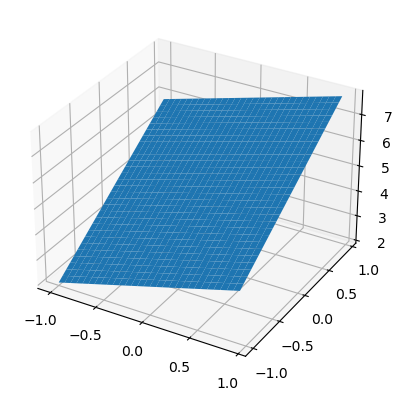

In [12]:
## Write your code here


def uniform(start,end,num):
  r = []
  for i in range(num):
    r1 = float(start) + i*(float(end-start)/float(num))
    r.append(r1)
  return r
x1 = uniform(-1,1,30)
x2 = uniform(-1,1,30)
x1 = np.asarray(x1)
x2 = np.asarray(x2)
w0 = 5
w1 = 1
w2 = 2
y=[]
for x_1 in x1:
  y1=[]
  for x_2 in x2:
    y1.append(w0 + w1*x_1 + w2*x_2)
  y.append(y1)
y = np.array(y)
# y = w0 + w1*x1 + w2*x2
X1, X2 = np.meshgrid(x1, x2)
Y = w0 + X1*w1 + X2*w2
ax = plt.axes(projection='3d')
# ax.scatter(x1,x2,Y)
# plt.show()
ax.plot_surface(X1,X2,Y)
plt.show()

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

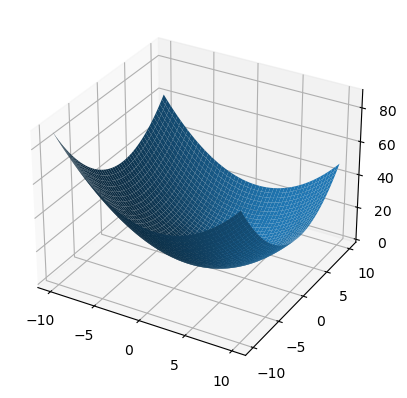

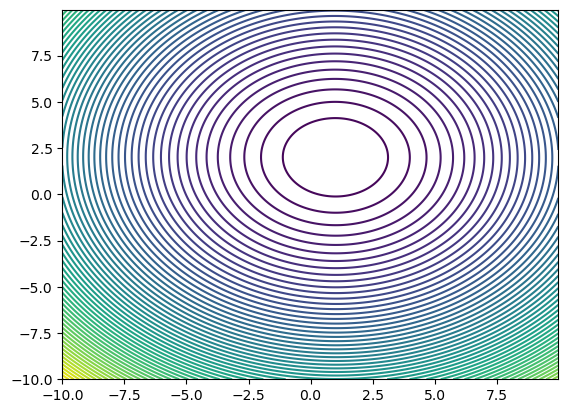

In [13]:
## Write your code here
w1 = uniform(-10,10,1000)
w2 = uniform(-10,10,1000)
# level = uniform(1,10,10)

error = []
for w_1 in w1:
  e2 = []
  for w_2 in w2:
    y1 = w0 + w_1*X1 +w_2*X2 
    e1 = np.sum((y-y1)**2)/900
    e2.append(e1)
  error.append(e2)
error = np.array(error)

w_1, w_2 = np.meshgrid(w1, w2)
ax = plt.axes(projection='3d')
ax.plot_surface(w_1,w_2, error)
plt.show()

plt.contour(w_1,w_2,error,70)
plt.show()

**Prediction using Gradient Descent**

(30, 30)
(900, 2)
[5.         0.98482099 1.98707424]


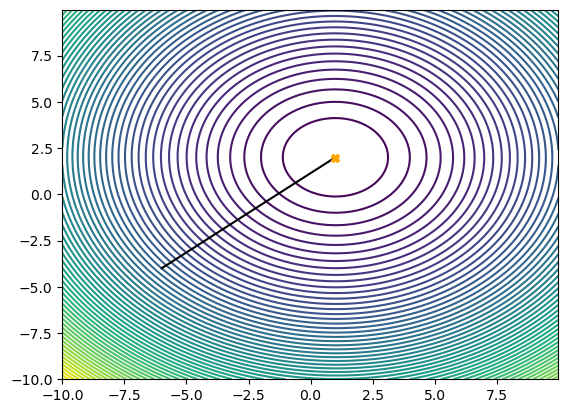

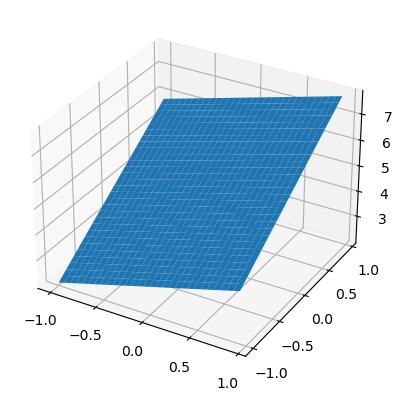

In [14]:
## Write your code here
y = w0 + 1*X1 + 2*X2
print(y.shape)
# y = y.reshape(30,1)
xnew = [X1.reshape(900,1),X2.reshape(900,1)]
xnew = np.array(xnew).reshape(900,2)
ynew = y.reshape(900,1)
# xnew = xnew.T
print(xnew.shape)
w = np.array([5.,-6.,-4.])
eps = 0.00001
lr = 0.1
indexs = [1,2]
num=900
w = np.array([5.,-6.,-4.])
eps = 0.00001
lr = 0.1
X1 = X1.reshape(900,1)
X2 = X2.reshape(900,1)
y = w[0] + 1*X1 +2*X2
error1 = 1000001.
error2 = 1000000.
error_gd=[]
w1=[]
w2=[]
epoch=0
while abs(error1-error2)>eps:
  epoch+=1
  # print(error1)
  y_pred = w[0] + w[1]*X1 + w[2]*X2
  w1.append(w[1])
  w2.append(w[2])
  error1 = np.sum((y-y_pred)**2)/num
  error_gd.append(error1)
  del_error_1 = -(np.sum(np.dot((y-y_pred).T,X1)))/num
  del_error_2 = -(np.sum(np.dot((y-y_pred).T,X2)))/num
  w[1] = w[1] - lr * del_error_1
  w[2] = w[2] - lr * del_error_2
  # print(w)
  y_pred = w[0] + w[1]*X1 + w[2]*X2
  error2 = np.sum((y-y_pred)**2)/num


print(w)
plt.contour(w_1,w_2, error, levels = 70)
# plt.show()
plt.plot(w1, w2, 'black')
plt.plot(w[1],w[2], 'orange', marker = 'X')
plt.show()

X1, X2 = np.meshgrid(x1, x2)
Y = w[0] + X1*w[1] + X2*w[2]
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Y)
plt.show()

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(6, 1)
(6, 1000)
(1000, 1)
[[1.05089781]
 [1.99949297]
 [3.0018782 ]
 [5.00064412]
 [8.99977438]
 [2.99965977]]
[[1.05080736]
 [1.99938275]
 [3.00165357]
 [5.00042268]
 [8.99985675]
 [2.99973227]]


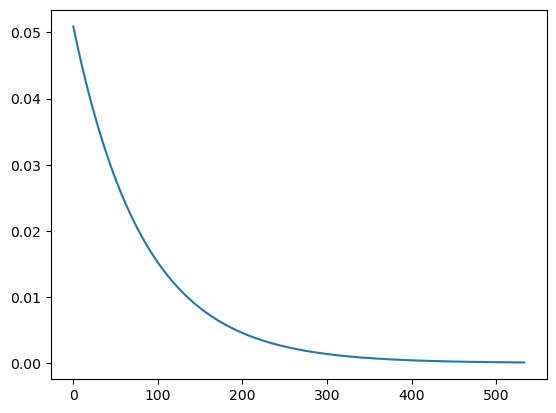

In [23]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    #write code here
    w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    return w

  def error(self,w,y,x):
    return (np.sum(y - (x.T@w)))/(y.shape[0])# write code here

  def mat_inv(self,y,x_aug):
    return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)# write code here
    
  # By Gradien descent

  def Regression_grad_des(self,x,y,w,lr):
    
    eps = 0.000001
    w_old = w # np.random.rand(x.shape[0],1)
    error1 = 100002.
    error2 = 100000.
    err = []
    while (abs(error1 - error2) > eps) :
      error1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)
      error2 = self.error(w_old,y,x)
      err.append(error1)
    w_pred = w_old
    return w_pred,err



#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
# x_aug = np.matrix([[1, 1, 1],
#           [7.56, 7.66, 7.70],
#           [7.77, 7.78, 7.85]])
# print(x_aug.shape)

# w=np.array([[-78],[21],[-10]]) # W=[w0,w1,.....,wM]'
w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

# # augment feat

x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
# print(x.shape)
print(x_aug.shape)


y=x_aug.T @ w  # vector multiplication
# y = np.matrix([[2.91, 4.97, 5.09]]).T
print(y.shape)


# corrupted by noise
nois=np.random.uniform(0,1,y.shape)
y=y+0.1*nois


#############################################################################

# By Computation (Normal Equation)
reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# by Gradien descent
lr=0.006
w_pred,err=reg.Regression_grad_des(x_aug,y,w,lr)
print(w_pred)

plt.plot(err)

plt.show()

In [22]:
# np.linalg.pinv(x_aug@x_aug.T)@x_aug

In [24]:
# a = np.linalg.pinv(x_aug@x_aug.T)@x_aug
# print(np.dot(a,y))

In [25]:
# test = np.matrix([[1, 1],
#                   [7.48, 7.57],
#                   [7.56, 7.69]])

In [26]:
# x_aug.T @ w_opt

In [27]:
# test.T @ w_opt

In [29]:
# new_r = x_aug.T @ w_pred
# print(new_r)
# print(np.sum(y-new_r))
# print(np.dot(test.T, w_pred))

# Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# !pip install idx2numpy

Mounted at /gdrive
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=5ac066857d3d0031c2195e7f11c35724a25311043ac402d14b0d89390d9f3f3b
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [30]:

df = pd.read_csv("./lab_files/Lab_06/salary_pred_data.csv")
print(df.head)

<bound method NDFrame.head of      Level of city  Years of experiance  Age  Level of education  Job profile  \
0                2                   11   34                   4            3   
1                4                   14   28                   1            4   
2                1                   13   55                   3            2   
3                4                   19   47                   1            7   
4                2                   10   24                   2            6   
..             ...                  ...  ...                 ...          ...   
995              4                    5   39                   1            3   
996              2                    6   59                   3            4   
997              1                   18   25                   3            1   
998              4                    3   51                   1            3   
999              4                   14   58                   3            3  

In [31]:
## Write your code here
x = df[['Level of city', 'Years of experiance', 'Age', 'Level of education',
       'Job profile']]
y = df[['Salary']]
# print(y)
x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
# print(np.ones((1,x.shape[0])).shape)
x_train,y_train,x_test,y_test = x[:900],y[:900],x[900:1000],y[900:1000]
# print(x_test.T)
reg = regression()
# w_pred=reg.mat_inv(y_train,x_train.T)
# print(w_pred)
# print(x_test.T.shape,w_pred.shape)
x_test = np.array(x_test)
# x_test_t = np.concatenate((np.ones((1,x_test.T.shape[1])), x_test.T),axis=0)
w_pred=reg.mat_inv(y_train,x_train.T)
print(x_test[0:3]@w_pred)
y_pred = x_test@w_pred
print(y_pred)
error=reg.error(w_pred,y_test,x_test.T)/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized testing error=',error,'\n')

print('predicted salary=',y_pred[0:3],'\n')
print('actual salary=',y_test[0:3])

error=reg.error(w_pred,y_train,x_train.T)/((np.max(y_train)-np.mean(y_train))**2)

print('Normalized training error=',error,'\n')

    Salary
0  33184.0
1  52740.0
2  58152.0
     Salary
0   33184.0
1   52740.0
2   58152.0
3   44292.0
4   50184.0
..      ...
95  43878.0
96  45618.0
97  29750.0
98  43702.0
99  45416.0

[100 rows x 1 columns]
Normalized testing error= Salary    0.0
dtype: float64 

predicted salary=     Salary
0  33184.0
1  52740.0
2  58152.0 

actual salary=      Salary
900   33184
901   52740
902   58152
Normalized training error= Salary   -6.748428e-19
dtype: float64 



/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **pas

In [37]:
x_train = np.array(x_train,dtype=np.float64)
y_train = np.array(y_train,dtype=np.float64)
x_test = np.array(x_test,dtype=np.float64)
y_test = np.array(y_test,dtype=np.float64)
# print(x_train)
w=np.array([[1],[2],[3],[5],[9],[3]])
w_pred_gd,err1 = reg.Regression_grad_des(x_train.T,y_train,w=w,lr = 0.0001)
print(w_pred_gd)
y_pred = x_test@w_pred_gd
# print(y_pred)
error=reg.error(w_pred_gd,y_test,x_test.T)/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized testing error=',error,'\n')

print('predicted salary=',y_pred[0:3],'\n')
print('actual salary=',y_test[0:3])



error=reg.error(w_pred_gd,y_train,x_train.T)/((np.max(y_train)-np.mean(y_train))**2)

print('Normalized training error=',error,'\n')



[[1.99950537e+04]
 [2.00029924e+03]
 [1.00059916e+02]
 [2.04845316e+00]
 [3.00377804e+02]
 [5.00012280e+03]]
Normalized testing error= 3.245125382700772e-10 

predicted salary= [[33184.15971052]
 [52738.94915711]
 [58150.52749011]] 

actual salary= [[33184.]
 [52740.]
 [58152.]]
Normalized training error= 2.614808232862574e-10 



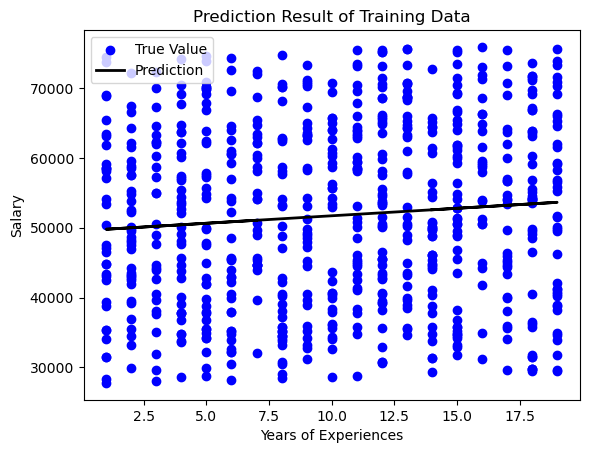

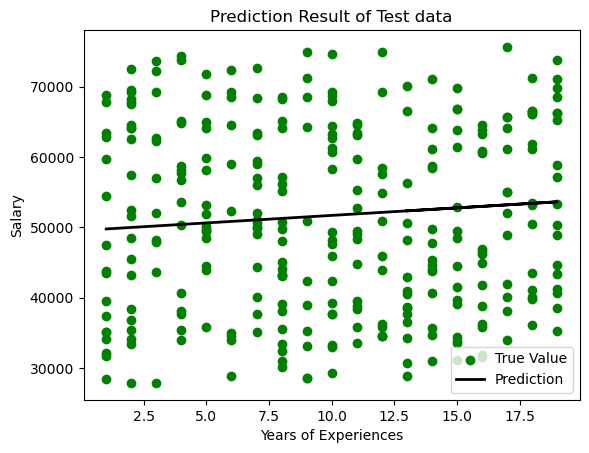

In [38]:
dataset = pd.read_csv('./lab_files/Lab_06/salary_pred_data.csv')
X = dataset['Years of experiance']
y = dataset['Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()
